# **Sentiment Analysis on the IMDB movie reviews**

## **Context**

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

## **Objective**

The dataset contains approximately 16,000 movie reviews. The objective is to do Sentiment Analysis(positive/negative) for the movie reviews using Deep Learning Sequential model Long short term Memory (LSTM) different techniques and observe the accurate results.


## **Data Dictionary**
- **Phrases:** reviews of the movies.
- **sentiment:** indicates the sentiment of the review 0 or 1( 0 is for negative review and 1 for positive review)        

## **Installing the libraries**

In [ ]:
# # Install contractions for expanding contractions in text e.g I'm to I am
# !pip install contractions

# # Install vader sentiment package for sentiment analysis
# !pip install vaderSentiment

# # Install textblob package for text processing and sentiment analysis
# !pip install textblob

# # Install WordCloud package for creating word cloud visualizations
# !pip install wordcloud

# # Install Contractions package for expanding contractions in text
# !pip install contractions

# # Install seaborn for data visualization
# !pip install seaborn

# # Install nltk for natural language processing tasks
# import nltk
# nltk.download("all")  # Download all NLTK data
# nltk.download("omw-1.4")  # Download WordNet data
# nltk.download('vader_Lexicon')  # Download VADER Lexicon for sentiment analysis

# # Install scikit-learn for machine learning algorithms and tools
# !pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

## **Importing the required the libraries **

In [ ]:

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters

#import unidecode

# Importing the NLTK library
import nltk

nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the dataset**

In [ ]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/sent_a/sentiment analysis data.csv")

In [ ]:
# Creating the copy of the data frame
df = data.copy()

In [ ]:
df["SentenceId"].nunique()

8529

## **Overview of the dataset**

In [ ]:
# View the first and last 15 rows of the dataset

df.head(15)

,PhraseId,SentenceId,Phrase,Sentiment,Sent_count
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,5,1,series,2,6
4,6,1,of escapades demonstrating the adage that what is good for the goose,2,68
5,7,1,of,2,2
6,8,1,escapades demonstrating the adage that what is good for the goose,2,65
7,9,1,escapades,2,9
8,10,1,demonstrating the adage that what is good for the goose,2,55
9,11,1,demonstrating the adage,2,23


- we need to watch out for characters like some html tags e.g.'<br <br /', ö , digit numbers, etc i
-  Here, a sentiment value 0 - negative, 1 - somewhat negative, 2 - neutral, 3 - somewhat positive, 4 - positive
- in this project, we will focus on only the positive and negative classes

In [ ]:
df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment', 'Sent_count'], dtype='object')

- we are interested in the 'Phrase' and 'Sentiment' columns

In [ ]:
df = df.loc[:, ["Phrase", "Sentiment"]]

In [ ]:
df["Sentiment"].unique()

array([1, 2, 3, 4, 0])

* The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

### **Understand the shape of the dataset**

In [ ]:
# Print shape of data
df.shape

(156015, 2)

### **Check the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156015 entries, 0 to 156014
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Phrase     156015 non-null  object
 1   Sentiment  156015 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


**Observations:**

* Data has 156,015 rows and 2 columns.
* Both the columns are object type.
* There are no null values present in the dataset.

#### Checking for missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values for each column
print(missing_values)

Phrase       0
Sentiment    0
dtype: int64


### **Checking for duplicate values**

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

* There are no duplicate values present in the data .

## **Exploratory Data Analysis**

**Word Cloud for cleaned Negative Reviews**

A word cloud in sentiment analysis visually represents the most frequent words in a text dataset. The size of each word indicates its frequency or importance. This tool helps quickly identify prominent terms and patterns, aiding in understanding the general themes and sentiment. Positive and negative words can be distinguished by color coding, providing an intuitive overview of the sentiment distribution in the analyzed text.

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = df[df['Sentiment'] == 0]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['Phrase'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


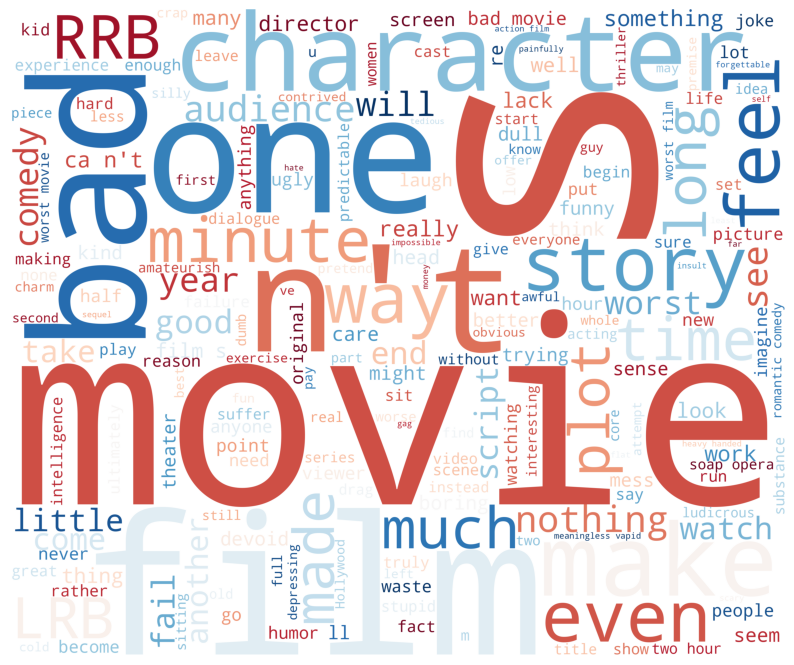

In [ ]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The **even, bad, fail, worst, little, maybe, instead, waste, still, boring** were some of the important recurring words observed in the negative reviews.

In [ ]:
# alternatively, we can create a function to check for both negative and positive reveiws

# defining a function for word cloud
def create_wordcloud(data, sent_value):
    reviews = data[data['Sentiment'] == sent_value]

    words = ' '.join(reviews['Phrase'])

    cleaned_word = " ".join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

    plt.figure(1, figsize = (10, 10))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()



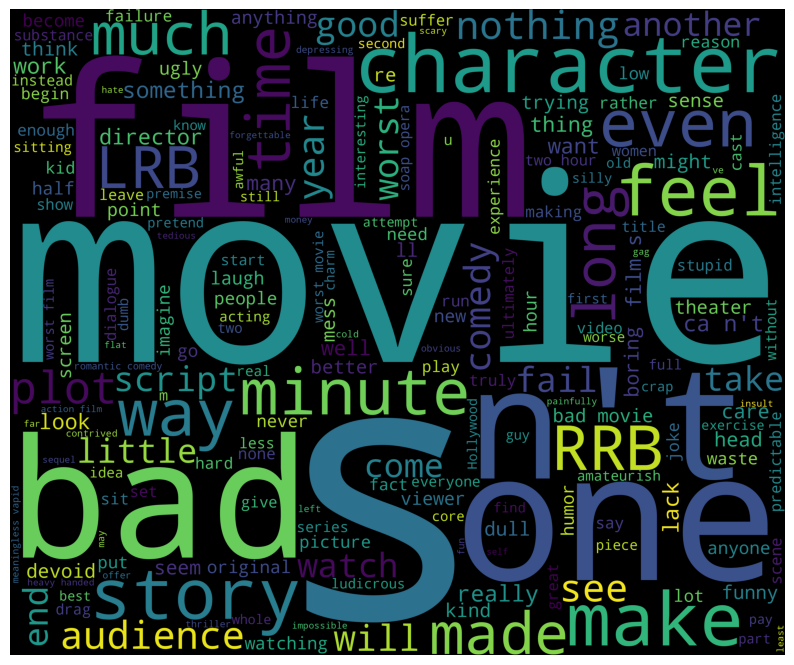

In [ ]:
# check word cloud for negative sentiments

# view the common texts in the negative reviews
create_wordcloud(df, 0)

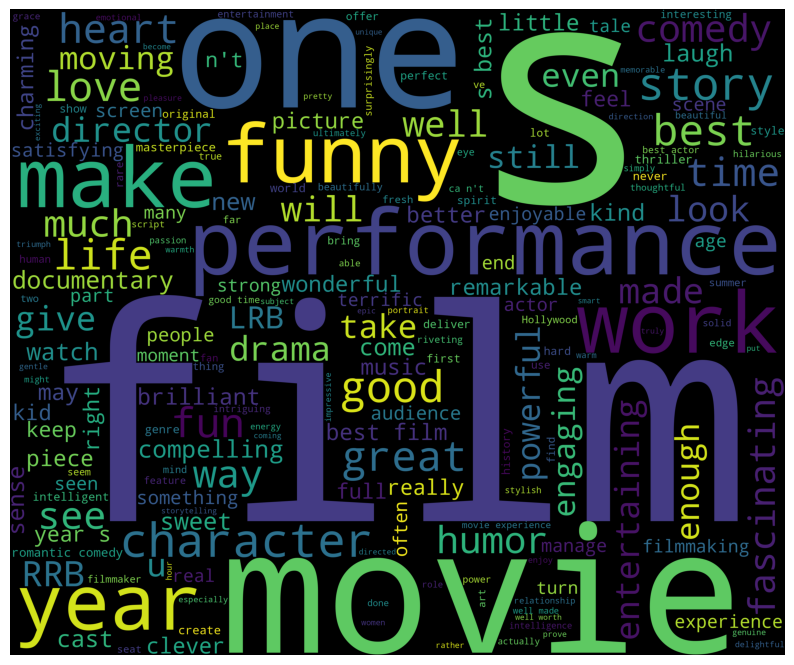

In [ ]:
# check word cloud for positive sentiments

# view the common texts in the positive reviews
create_wordcloud(df, 4)

- film, movie, performance, better, understanding, great, wonderful etc are the common words used in the positive sentiments

# Class Visualization

In [ ]:
# Check the labels

data["Sentiment"].unique()

array([1, 2, 3, 4, 0])

- there are five classess in the dependent variable

In [ ]:
# check the count of each labels
df['Sentiment'].value_counts()

Sentiment
2    79539
3    32927
1    27271
4     9206
0     7072
Name: count, dtype: int64

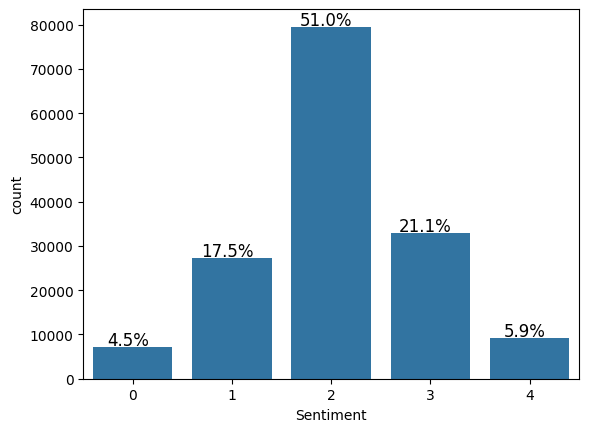

In [ ]:
# Plot the distribution of the class label
def bar_plot(data, feature):
    # Creating the countplot
    plot = sns.countplot(x = feature, data = data)

    # Finding the length the whole data
    total = len(data)

    # Creating the percentages to each label in the data
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    plt.show()

bar_plot(df,'Sentiment')

- We can observe that classes are not balanced. However the classes we are interested in are somewhat balanced

- let's select only the negative and postive classes

In [ ]:
new_df = df[(df["Sentiment"] == 0) | (df["Sentiment"] == 4)]

# Map sentiment values to binary labels
new_df["Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})

<ipython-input-21-d88c369bf1e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})


In [ ]:
import pandas as pd

# Select rows with sentiment 0 or 4
new_df = df[(df["Sentiment"] == 0) | (df["Sentiment"] == 4)].copy()

# Map sentiment values to binary labels using .loc to avoid the SettingWithCopyWarning
new_df.loc[:, "Sentiment"] = new_df["Sentiment"].map({0: 0, 4: 1})

# Check the shape of the new DataFrame
print("Shape of the new DataFrame:", new_df.shape)

# Check the distribution of the sentiment values
print(new_df["Sentiment"].value_counts())

# Check the first few rows of the new DataFrame
print(new_df.head())


Shape of the new DataFrame: (16278, 2)
Sentiment
1    9206
0    7072
Name: count, dtype: int64
                                                                        Phrase  \
60  This quiet , introspective and entertaining independent is worth seeking .   
63                          quiet , introspective and entertaining independent   
71                                                                entertaining   
74                                                            is worth seeking   
97                             would have a hard time sitting through this one   

    Sentiment  
60          1  
63          1  
71          1  
74          1  
97          0  


In [ ]:
print("Shape of the new DataFrame:", new_df.shape)


Shape of the new DataFrame: (16278, 2)


[link text](https://)- selecting only the data that relates with the negative sentiment and the postive sentiment

In [ ]:
new_df.reset_index(drop = True, inplace = True)

In [ ]:
new_df.shape

(16278, 2)

# **4. Data Pre-processing**

Before going to model building we should have to clean the data for the better model performance. The stages are as follows

1. Removing Contractions: Expands contractions to their full forms.
2. Removing Special Characters: Eliminates special characters. Target non-alphanumeric characters such as symbols (e.g., @, #, $, %, &, *)
3. Tokenization (text segmentation): Splits the text into individual words or tokens. **Tokenization** should come before other text cleaning methods because it splits the text into individual words or tokens, and only after this can you accurately perform text cleaning. Without tokenization, you wouldn't have a clear way to identify individual words to filter out stopwords effectively.

4. Removing Non-ASCII Characters: Ensures the text contains only standard ASCII characters. ASCII Characters are Standard English letters (A-Z, a-z), digits (0-9), and common punctuation marks and symbols. Non-ASCII characters include:

Accented Characters: é, ñ, ü, etc.
Special Symbols: ©, ®, €, etc.
Emoji and Unicode Symbols: 😃, 🌍, etc.

5. Lowercasing: Converts all characters to lowercase to ensure consistency.
6. Removing Punctuation: Removes punctuation marks from the text. Targets characters like periods, commas, exclamation points, question marks, colons, semicolons
7. Removing Stopwords: Removes common words that usually do not contribute much meaning.
8. Lemmatization -text normalization: Reduces words to their base or root form.
9. Feature extraction: This refers to the process of transforming raw data into a format that is suitable for machine learning algorithms. In NLP, this involves converting text into numerical representations that capture meaningful aspects of the text e.g. vectorization. **Vectorization** in NLP is a form of feature extraction used to convert raw text data into structured numerical representations (vectors) that capture important characteristics or features of the text, enabling subsequent analysis and modeling tasks. Examples include

- Bag of Words (BoW) - Feature extraction: Converts the text into a fixed-length vector based on word occurrences.

- TF-IDF - feature extraction: Converts text into a fixed-length vector based on the importance of words in a document relative to a corpus.

- Word Embeddings (Word2Vec, GloVe): Represent words as dense vectors in a continuous vector space. Word embeddings capture semantic meanings and relationships between words. Examples include Word2Vec, GloVe (Global Vectors for Word Representation), and FastText.

### 1. Removing Contractions  
Contractions are shortened forms of words or phrases that combine two words by replacing one or more letters with an apostrophe. Here are some examples of contractions in a text data:

I'm - contraction of "I am"
don't - contraction of "do not"
can't - contraction of "cannot"
won't - contraction of "will not"
it's - contraction of "it is" or "it has"
he's - contraction of "he is" or "he has"
they're - contraction of "they are"
we've - contraction of "we have"
isn't - contraction of "is not"
she'll - contraction of "she will"


Treating contractions as separate tokens can help in capturing their full meaning. For example, "can't" can be tokenized into "can" and "not," which provides a more granular representation of the text. It helps in reducing noise and inconsistencies in the text data, making it more suitable for further analysis or modeling tasks.

In [ ]:
import contractions

def remove_contractions(text):
    expanded_text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_text)
    return text

# Create a copy of new_df to avoid SettingWithCopyWarning
new_df = new_df.copy()
#new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_contractions(x))
# Apply the function using .loc to avoid the warning
new_df.loc[:, "Phrase"] = new_df["Phrase"].apply(remove_contractions)

# Check the first 2 rows of the DataFrame to verify changes
new_df.head(2)

,Phrase,Sentiment
0,"This quiet , introspective and entertaining independent is worth seeking .",1
1,"quiet , introspective and entertaining independent",1


### 2. Removing Special Characters and Digits
Special characters refer to any characters that are not considered alphanumeric (letters and numbers) or punctuation marks. They include symbols, diacritical marks, mathematical symbols, currency symbols, emoticons, and other non-alphabetic or non-numeric characters. Some common examples of special characters are:

1. ! - exclamation mark
2. @ - at symbol
3. '#' - hashtag or number sign
4. $ - dollar sign
5. % - percent sign
6. & - ampersand
7. '*' - asterisk
8. ( ) - parentheses
9. { } - curly brackets or braces
10. '[ ]' - square brackets
11. ^ - caret or circumflex
12. ~ - tilde
13. '+ - 'plus sign
14. '- -' hyphen or minus sign
15. = - equals sign
16. / - forward slash or slash
17. \ - backslash
18. | - vertical bar or pipe
19. : - colon
20. ; - semicolon
21. " " - quotation marks (double or single)
22. ' - apostrophe
23. , - comma
24. . - period or full stop
25. ? - question mark
26. _ - underscore
27. < > - angle brackets or chevrons
28. © - copyright symbol
29. ® - registered trademark symbol
30. ™ - trademark symbol

These special characters can be present in various forms of text data, including documents, emails, social media posts, website content, and more. When working with text data, it's important to consider the presence and handling of special characters based on the specific task or analysis being performed.

In [ ]:
def remove_special_chars(text):
    text= re.sub("[^a-zA-Z]", " ", text) #remove any word that is not an alphabet and replace with empty space
    return text
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_special_chars(x))

# Check the first 2 rows of the DataFrame to verify changes
new_df.head(2)


,Phrase,Sentiment
0,This quiet introspective and entertaining independent is worth seeking,1
1,quiet introspective and entertaining independent,1


### 3. Tokenization
The most common form of tokenization is word tokenization, where the text is divided into individual words. For example, the sentence "Tokenization is an important step in NLP." would be tokenized into the following tokens: ["Tokenization", "is", "an", "important", "step", "in", "NLP", "."]

it helps with text preprocessing, feature extraction, vocabulary creation and text understanding

In [ ]:
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

# nltk_data_path = os.path.join(nltk.data.find('tokenizers'), 'punkt.zip')
# if os.path.exists(nltk_data_path):
#     os.remove(nltk_data_path)

# Ensure the punkt tokenizer is downloaded
# downloading punkt manually and importind from the folder path
#import nltk
#nltk.data.path.append('C:/Users/DELL/AppData/Roaming/nltk_data')
#from nltk.tokenize import word_tokenize
# in case punkt refuses to download here, download it manually and paste the folder on nltk_data under hidden Appdata folder on your PC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import word_tokenize

new_df["Phrase"] = new_df.apply(lambda row: word_tokenize(row["Phrase"]), axis=1)

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)

,Phrase,Sentiment
0,"[This, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


### 4. Removing Non-ASCII Characters

In [ ]:
import unicodedata

def remove_non_ascii (words):
    new_words = []
    for word in words:
        new_word =unicodedata.normalize('NFKD', word).encode('ascii', "ignore").decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_non_ascii(x))

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)

,Phrase,Sentiment
0,"[This, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


### 5. Lowercasing

In [ ]:
def to_lowercase(words):
    word = [word.lower() for word in words]
    return word


# Apply the function to each element in the 'Phrase' column
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: to_lowercase(x))

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)


,Phrase,Sentiment
0,"[this, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


### 6. Removing Punctuations

Removing punctuation in text analysis is done to simplify the text and focus on the essential words and their meaning. Punctuation marks such as periods, commas, and question marks do not typically carry significant semantic information and can introduce noise in the analysis. By removing punctuation, the text becomes more consistent, allowing for better tokenization, word frequency analysis, and natural language processing tasks.

In [ ]:
def remove_punctutation(words):
    word= [word for word in words if word not in string.punctuation]
    return word

# Apply the function to each element in the 'Phrase' column
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_punctutation(x))

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)

,Phrase,Sentiment
0,"[this, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


### 7. Removing Stopwords

In text analysis, stopwords are commonly used words that do not carry significant meaning and are often removed to improve the accuracy and efficiency of text processing. These words include articles (e.g., "the", "a"), prepositions (e.g., "in", "on"), pronouns (e.g., "he", "she"), and conjunctions (e.g., "and", "but").

Stopword removal helps eliminate noise and focuses on the more important content words in a text. By removing stopwords, the analysis can be streamlined and the resulting insights can be more meaningful.

Example: Consider the sentence: "The quick brown fox jumps over the lazy dog."

If we remove the stopwords "the" and "over", the sentence becomes: "quick brown fox jumps lazy dog."

In this example, the stopwords "the" and "over" are removed as they do not significantly contribute to the meaning of the sentence. The remaining content words carry the essence of the sentence and can be more useful for analysis.

In [ ]:
from nltk.corpus import stopwords
stop_words= stopwords.words("english")
def remove_stopwords(words):
    word = [word for word in words if word not in stop_words]
    return word

# Apply the function to each element in the 'Phrase' column
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: remove_stopwords(x))

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)

,Phrase,Sentiment
0,"[quiet, introspective, entertaining, independent, worth, seeking]",1
1,"[quiet, introspective, entertaining, independent]",1
2,[entertaining],1
3,"[worth, seeking]",1


### 8. Lemmatization and Stemming

both lemmatization and stemming are techniques used in natural language processing (NLP) to reduce words to their base or root form, which helps in normalizing variations of words.

Stemming involves chopping off the end of words to remove prefixes and suffixes, aiming to derive the root form of a word. For example:

Original: "running"
Stemmed: "run"
Stemming is simpler and faster but may not always result in a real word. It's more heuristic-based and operates on fixed rules.

Lemmatization, on the other hand, uses a vocabulary and morphological analysis to reduce words to their base form (lemma). It considers the context and meaning of a word, ensuring that the resulting lemma is a valid word in the language. For example:

Original: "better"
Lemmatized: "good"
Lemmatization requires more computational resources and linguistic knowledge but generally provides more accurate results as it understands the meaning of words.

- lemmatization does not necessary remove suffixes and suffices but uses more acurate text. Stemming can result in a word that is not an actual word, known as a stem. For example:

Word: "running"
Stem (after stemming): "run"

Word: "better"
Stem (after stemming): "bett"

Lemmatization is preferred when precision and language correctness are crucial, such as in language translation, sentiment analysis, or question answering systems.


In [ ]:
#nltk.download("wordnet")
# using lemmatization
lm= WordNetLemmatizer()
def lemmatize_words(words):
    word=[lm.lemmatize(word) for word in words]
    return word

# Apply the function to each element in the 'Phrase' column
new_df["Phrase"] = new_df["Phrase"].apply(lambda x: lemmatize_words(x))

# Check the first few rows of the DataFrame to verify changes
new_df.head(4)

,Phrase,Sentiment
0,"[quiet, introspective, entertaining, independent, worth, seeking]",1
1,"[quiet, introspective, entertaining, independent]",1
2,[entertaining],1
3,"[worth, seeking]",1


In [ ]:
## use if punkt was successfully downloaded automatically as a zip file

# from nltk.stem import PorterStemmer, WordNetLemmatizer

# lm = WordNetLemmatizer()

# ps = PorterStemmer()

# def lemmatize_words(row):
#   words = [lm.lemmatize(word) for word in row]
#   #words = [ps.stem(word) for word in row]   # for stemming
#   return words

# new_df["Phrase"] = new_df["Phrase"].apply(lambda x: lemmatize_words(x))


## ----------

# use if punkt was manually downloaded and saved as a normal folder on the PC

# lm = WordNetLemmatizer()
# ps = PorterStemmer()

# # Function to lemmatize words
# def lemmatize_words(row):
#     if isinstance(row, str):  # Ensure the input is a string
#         words = word_tokenize(row)  # Tokenize the row text
#         lemmatized_words = [lm.lemmatize(word) for word in words]
#         # For stemming, uncomment the next line and comment the above line
#         # lemmatized_words = [ps.stem(word) for word in words]
#         return ' '.join(lemmatized_words)
#     else:
#         return row  # Return the row unchanged if it is not a string

# # Apply the function to the 'Phrase' column
# new_df["Phrase"] = new_df["Phrase"].apply(lemmatize_words)

# # Check the output
# print(new_df["Phrase"].head())

In [ ]:
# # use if punkt was manually downloaded and saved as a normal folder on the PC

# lm = WordNetLemmatizer()
# ps = PorterStemmer()

# # Function to lemmatize words
# def lemmatize_words(row):
#     if isinstance(row, str):  # Ensure the input is a string
#         words = word_tokenize(row)  # Tokenize the row text
#         lemmatized_words = [lm.lemmatize(word) for word in words]
#         # For stemming, uncomment the next line and comment the above line
#         # lemmatized_words = [ps.stem(word) for word in words]
#         return ' '.join(lemmatized_words)
#     else:
#         return row  # Return the row unchanged if it is not a string

# # Apply the function to the 'Phrase' column
# new_df["Phrase"] = new_df["Phrase"].apply(lemmatize_words)

# # Check the output
# print(new_df["Phrase"].head())

### Putting All together

In [ ]:
def join_words(row):
  words = " ".join([word for word in row])
  return words

new_df["Phrase"] = new_df["Phrase"].apply(lambda x: join_words(x))

In [ ]:
new_df.head(3)

,Phrase,Sentiment
0,quiet introspective entertaining independent worth seeking,1
1,quiet introspective entertaining independent,1
2,entertaining,1


In [ ]:
print("Before saving, missing values in new_df:")
print(new_df.isnull().sum())

Before saving, missing values in new_df:
Phrase       0
Sentiment    0
dtype: int64


In [ ]:
# Mount Google Drive
#drive.mount('/content/drive')

# Save the cleaned dataset with explicit encoding
new_df.to_csv("/content/drive/MyDrive/cleaned_df.csv", index=False)

# Load the cleaned dataset with the same encoding
data = pd.read_csv("/content/drive/MyDrive/cleaned_df.csv")

In [ ]:
# Check for missing values after loading
print("After loading, missing values in data_df:")
print(data.isnull().sum())

After loading, missing values in data_df:
Phrase       1
Sentiment    0
dtype: int64


In [ ]:
# Display rows with missing values in the Phrase column
print(data[data["Phrase"].isnull()])


     Phrase  Sentiment
6763    NaN          1


In [ ]:
# Print the row at index 6763 in the original new_df
#print("Row at index 6763 in the original new_df:")
#print(new_df.loc[6763])


In [ ]:
# Print the row at index 6763 in the original new_df
print("Row at index 6763 in the original data:")
print(data.loc[6763])


Row at index 6763 in the original data:
Phrase       NaN
Sentiment      1
Name: 6763, dtype: object


- since index  6763 has an empty string that was saved as NAN in our new data, it will be dropped so as to continue with the newly uploaded data

In [ ]:
# # Remove rows with missing values
data = data.dropna()

# # Display the cleaned DataFrame
print(data)

                                                                  Phrase  \
0             quiet introspective entertaining independent worth seeking   
1                           quiet introspective entertaining independent   
2                                                           entertaining   
3                                                          worth seeking   
4                                            would hard time sitting one   
...                                                                  ...   
16273                            unfocused excruciatingly tedious cinema   
16274                            unfocused excruciatingly tedious cinema   
16275                                             excruciatingly tedious   
16276  really great job anchoring character emotional reality middle age   
16277         great job anchoring character emotional reality middle age   

       Sentiment  
0              1  
1              1  
2              1  
3          

In [ ]:
data.head()

,Phrase,Sentiment
0,quiet introspective entertaining independent worth seeking,1
1,quiet introspective entertaining independent,1
2,entertaining,1
3,worth seeking,1
4,would hard time sitting one,0


In [ ]:
# # checking for missing values
data.isnull().sum()

Phrase       0
Sentiment    0
dtype: int64

In [ ]:
data.columns

Index(['Phrase', 'Sentiment'], dtype='object')

# Model Development

NLP models can be built using either

1.  Classical Machine learning methods

- Supervised Learning:  involves the use of vectorization e.g. (Bag of Words (CountVectorizer), TD-IDF
- Unsupervised: e.g VADER

2. Deep learning

- LSTM
- BERT

## Supervised Learning for Sentiment Analysis

### Using Bag of Words (Count Vectorizer)

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

"""if we convert the whole data using count vectorizer, we will obtain a lot of columns since there are many unique
words in the dataset, hence we will keep about 100-500 features/ words"""

#Keep only 500 features as number of features will increase the processing time.
count_vec = CountVectorizer(max_features=500) # keeping thhe top 500 words
data_features = count_vec.fit_transform(data["Phrase"]) # passing the Phrase column and telling it to transform it using BOW

#Convert the data features to array
data_features= data_features.toarray()


In [ ]:
# Shape of the feature vector

data_features.shape

(16277, 500)

In [ ]:
# Select the features and target
X = data_features
y = data["Sentiment"]


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Data splitting

# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train

13704    0
16136    1
13574    0
12311    0
4967     0
        ..
13124    1
3264     0
9846     0
10800    1
2732     0
Name: Sentiment, Length: 13021, dtype: int64

#### Implement Random Forest Model on BOW

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1425
           1       0.90      0.86      0.88      1831

    accuracy                           0.87      3256
   macro avg       0.87      0.87      0.87      3256
weighted avg       0.87      0.87      0.87      3256



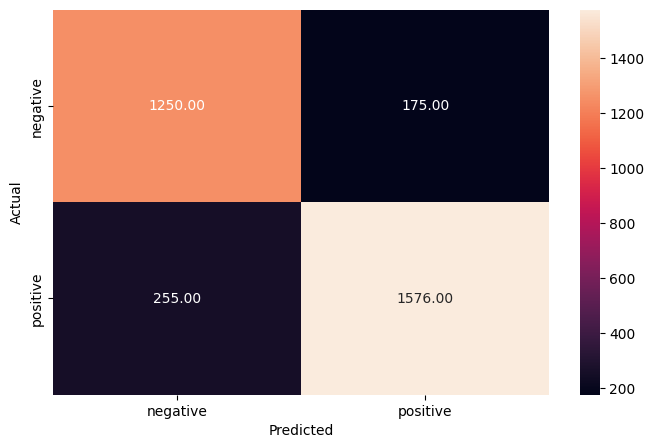

In [ ]:
# Training the best model and calculating accuracy on test data

rf = RandomForestClassifier(random_state = 0)

# train the model
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# check metrics
metrics_score(y_test, y_pred)


- 1254 negative sentiments were correctly predicted as negative sentiments
- 1581 positive sentiments were correctly predicted
- 171 negative sentiments were wrongly predicted as positive sentiments
- 250 positive sentiments were wrongly predicted as negative sentiments

In [ ]:
# Save the model and vectorizer to Google Drive
model_path = '/content/drive/My Drive/rf_model_bow.pkl'
vectorizer_path = '/content/drive/My Drive/count_vectorizer.pkl'
joblib.dump(rf, model_path)
joblib.dump(count_vec, vectorizer_path)

print(f"Model saved at {model_path}")
print(f"Vectorizer saved at {vectorizer_path}")

Model saved at /content/drive/My Drive/rf_model_bow.pkl
Vectorizer saved at /content/drive/My Drive/count_vectorizer.pkl


In [ ]:
# Print the version of scikit-learn for count vec
print(f"scikit-learn version: {sklearn.__version__}")

scikit-learn version: 1.2.2


In [ ]:
# # deployment code on anaconda prompt # ensure the packagesused taly with the ones you install on prompt
# code on anaconda prompt
# conda create -n glove python=3.9 -y
# pip install streamlit
# pip install joblib==1.4.2
# pip install scikit-learn==1.2.2
# streamlit run countvec.py --server.port 8502

# code on VS code
# import streamlit as st
# import joblib
# import numpy as np

# # Load the pre-trained model and CountVectorizer
# model_path = 'rf_model_bow.pkl'
# vectorizer_path = 'count_vectorizer.pkl'
# rf_model_bow = joblib.load(model_path)
# vectorizer = joblib.load(vectorizer_path)

# # Streamlit app
# st.title("Sentiment Analysis App")
# st.markdown("#### Platform built using a Random Forest model trained on Bag-of-Words (BOW) features")

# st.write("Enter a sentence to check its sentiment:")

# input_sentence = st.text_input("Sentence")

# if input_sentence:
#     # Transform the input sentence using the loaded CountVectorizer
#     processed_input = vectorizer.transform([input_sentence])

#     # Predict sentiment and probability
#     prediction = rf_model_bow.predict(processed_input)[0]
#     probability = rf_model_bow.predict_proba(processed_input)
#     prob_positive = probability[0][1]  # Probability of being positive
#     prob_negative = probability[0][0]  # Probability of being negative

#     # Determine sentiment label
#     sentiment = "Positive" if prediction == 1 else "Negative"

#     # Display the result
#     st.write(f"The sentiment of the text '{input_sentence}' is predicted as: {sentiment}")
#     st.write(f"Probability (Positive): {prob_positive:.2f}")
#     st.write(f"Probability (Negative): {prob_negative:.2f}")



#### Feature importance
Given the usage of a tree-based model with feature importance analysis, we can identify the key features that distinguish between positive and negative words, revealing their relative significance.

In [ ]:
def get_top40_words(model, all_features): #top 40 words important in predicting whether a word is negative or postive

    # Addition of top 40 feature into top_feature after training the model
    top_features=''

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1] #sorting them

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','

    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000,
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

In [ ]:
count_vec.get_feature_names_out()

array(['able', 'absolutely', 'act', 'acted', 'acting', 'action', 'actor',
       'actually', 'adult', 'adventure', 'age', 'almost', 'along',
       'already', 'also', 'always', 'american', 'amusing', 'animated',
       'animation', 'another', 'anyone', 'anything', 'around', 'art',
       'artist', 'attempt', 'audience', 'away', 'awful', 'back', 'bad',
       'badly', 'barely', 'beautiful', 'beautifully', 'beauty', 'become',
       'becomes', 'begin', 'believe', 'best', 'better', 'beyond', 'big',
       'bit', 'black', 'bland', 'boring', 'brilliant', 'ca', 'camera',
       'capture', 'care', 'career', 'cast', 'character', 'charm',
       'charming', 'cheap', 'child', 'cinema', 'cinematic',
       'cinematography', 'class', 'classic', 'clever', 'cliche', 'come',
       'comedy', 'comic', 'coming', 'compelling', 'completely', 'concept',
       'contrived', 'cool', 'core', 'could', 'crafted', 'creative',
       'credit', 'crime', 'culture', 'dark', 'day', 'dazzling', 'death',
       'debut

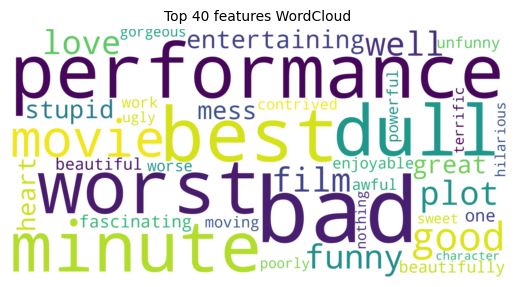

In [ ]:
 #Instantiate the feature from the vectorizer
import numpy as np
features = count_vec.get_feature_names_out()
get_top40_words(rf,features)

- the top 40 words that the model detected to help distinguish between negative and positive words are mostly the common positive and negative words
- This shows that Bag of Words is slightly satisactory
- Let's explore another vectorization method in building the classical ML model

## **TF-IDF**

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.
#Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer

#Keep only 500 features as number of features will increase the processing time
tfidf_vec = TfidfVectorizer(max_features=500)

data_features = tfidf_vec.fit_transform(data["Phrase"])

#Convert the data features to array
data_features= data_features.toarray()

In [ ]:
# Select the features and target
X = data_features
y = data["Sentiment"]


In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#### Implement Random Forest Model on TF-IDF

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1425
           1       0.89      0.86      0.88      1831

    accuracy                           0.86      3256
   macro avg       0.86      0.87      0.86      3256
weighted avg       0.87      0.86      0.87      3256



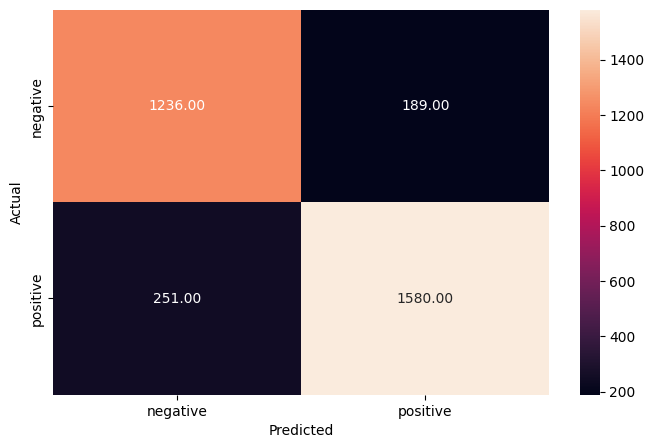

In [ ]:
# Training the best model and calculating accuracy on test data
rf2 = RandomForestClassifier(random_state = 0)

# train the model
rf2.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf2.predict(X_test)

# check metrics
metrics_score(y_test, y_pred)



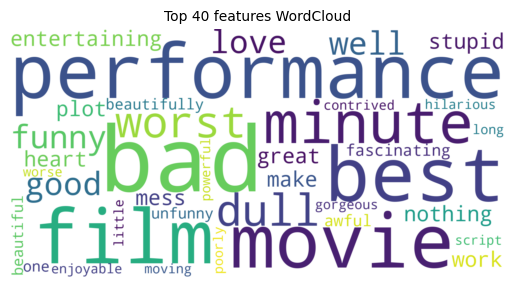

In [ ]:
#Instantiate the feature from the vectorizer
features = tfidf_vec.get_feature_names_out()

get_top40_words(rf2,features)

- This result is similar to that of BOW. Let's explore deep learning models for improvement opportunities

- TF-IDF shows a better performance than Count Vectorizer, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# Unsupervised Learning methods for Sentiment Analysis

## VADER
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis library or tool. It not only provides us the Positivity and Negativity score of a sentiment, but also tells us the degree of positivity or negativity of it.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

#make a copy of dataframe and do unsupervised operation
data_new = data.copy()

# Calculate the polarity score of the Phrases without involving the Sentiment column
data_new['scores'] = data_new['Phrase'].apply(lambda text: sentiment.polarity_scores(text))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Classify the class of the review by keeping threshold on the compund score

# Extract the compound score
data_new['compound'] = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

# Classify the class of the review by keeping threshold on the compound score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >= 0 else '0')

# Display the resulting DataFrame
print(data_new.head())

                                                       Phrase  Sentiment  \
0  quiet introspective entertaining independent worth seeking          1   
1                quiet introspective entertaining independent          1   
2                                                entertaining          1   
3                                               worth seeking          1   
4                                 would hard time sitting one          0   

                                                          scores  compound  \
0   {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5859}    0.5859   
1   {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}    0.4404   
2       {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}    0.4404   
3   {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}    0.2263   
4  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}   -0.1027   

  comp_score  
0          1  
1          1  
2          1  
3          1  

In [ ]:
data_new["VADER_pred"] = data_new['comp_score'].tolist()

              precision    recall  f1-score   support

           0       0.88      0.53      0.66      7072
           1       0.72      0.94      0.82      9205

    accuracy                           0.76     16277
   macro avg       0.80      0.73      0.74     16277
weighted avg       0.79      0.76      0.75     16277



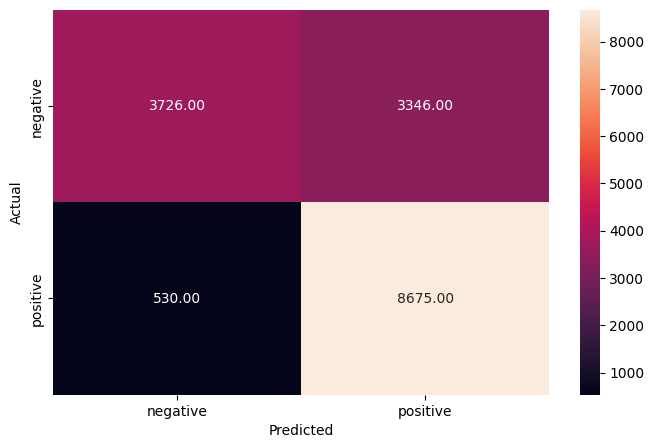

In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data_new["sentiment"] = data_new["Sentiment"].astype(int)   #convert the sentiment column values into int data type

data_new["VADER_pred"] = data_new["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type

metrics_score(data_new["sentiment"], data_new["VADER_pred"])

In [ ]:
data.shape

(16277, 2)

## TextBlob

TextBlob is a Python library that simplifies natural language processing (NLP) tasks such as sentiment analysis, part-of-speech tagging, and text classification. It offers straightforward APIs for processing textual data, making it accessible for tasks like extracting insights from text, identifying language patterns, and performing basic NLP operations.

In [ ]:
from textblob import TextBlob
data_new_2 = data.copy()      # make a copy of dataframe

# Calculate the polarity score of the reviews
data_new_2['polarity']  = data_new_2['Phrase'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classify the class of the review by keeping threshold on the polarity score
data_new_2['polarity_score'] = data_new_2['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new_2["Text_Blob_pred"] = data_new_2['polarity_score'].tolist()

              precision    recall  f1-score   support

           0       0.87      0.53      0.65      7072
           1       0.72      0.94      0.81      9205

    accuracy                           0.76     16277
   macro avg       0.79      0.73      0.73     16277
weighted avg       0.78      0.76      0.74     16277



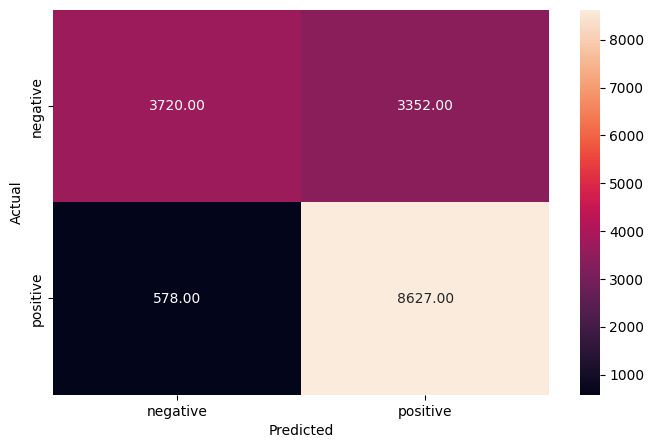

In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data_new_2["Sentiment"] = data_new_2["Sentiment"].astype(int)  #convert the sentiment column values into int data type

data_new_2["Text_Blob_pred"] = data_new_2["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type

metrics_score(data_new_2["Sentiment"], data_new_2["Text_Blob_pred"])

- Text Blob works better than Vader because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.

# Introduction to Dense Vector -  Word2Vec & GloVe

## Word2Vec
during BOW,the order of the sentences and semantics are lost. Dense vector was developed to address this limitations.
Principle; words that are most frequently used together e.g. ice & water, kings & queens must have similar vectors. It goes through each word in the test and gives the vector representation. Any where ice occur in the test and water occur, those 2 words will have similar vectors using word2vec

- Word2vec is a two-layer neural network-based method for efficiently creating word embeddings.
- It was developed in 2013 by Tomas Mikolov et al. at Google as a response to make neural-network-based embedding training more efficient, and it has since become the defacto standard for building pre-trained word embeddings.
- Word2vec takes a text corpus as input and returns a set of vectors known as feature vectors that represent the words in that corpus.

### Types
Word2vec has two models which are used to train words against their neighboring words in the corpus, namely:
1. Continuous Bag of Words (CBOW) - uses the context to predict the target word

e.g. I love to ---- food everyday

the ----- is the NLP target; CBOW will sum the vectors first 2 words before target and first 2 words after the target (called vector) to derive the target

![image.png](attachment:image.png)

#### Word2Vec

In [ ]:
# # install gensim
# !pip install gensim==3.8.3
# # to install the version with the complete vectors
# #pip install gensim


In [ ]:
# we cannot operate word2vec the same way we operate count vectorizer from the dataframe
# hence we will put all the text into a list before tokenizing and implementing word2vec

new_data = data.copy()
word_list =[]
for sent in new_data['Phrase']:
  li = list(sent.split()) #split by default will use space
  # the test will be saved into a list of word; hoever to be on the safe side, it was converted to list
  word_list.append(li)

# check the words in the first 5 rows
word_list[:5]

[['quiet', 'introspective', 'entertaining', 'independent', 'worth', 'seeking'],
 ['quiet', 'introspective', 'entertaining', 'independent'],
 ['entertaining'],
 ['worth', 'seeking'],
 ['would', 'hard', 'time', 'sitting', 'one']]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(word_list)

# save the model
model.save('/content/drive/MyDrive/word2vec.model')

# checking the word vectors
# let's check the word vectors for the word 'Problem'
word = 'great'
model.wv[word]

array([-0.40127227,  0.5158111 ,  0.04174276,  0.15558523,  0.00786829,
       -0.96624047,  0.10367499,  0.84735215, -0.332608  , -0.31158754,
       -0.25230882, -0.57780415,  0.06283507,  0.21906534, -0.09865074,
       -0.25281852,  0.00141457, -0.57659525,  0.12906736, -0.7729841 ,
        0.21985683, -0.08649211,  0.2595615 , -0.14521587, -0.02523752,
        0.03406525, -0.28147635, -0.3119119 , -0.39060277,  0.00192232,
        0.58841205,  0.0461118 ,  0.13768987, -0.19173841, -0.2659094 ,
        0.32340863, -0.15022568, -0.39405727, -0.11324747, -0.8055619 ,
       -0.0233654 , -0.39939138, -0.10668362, -0.13432236,  0.21464269,
       -0.31292042, -0.35560542,  0.11705363,  0.10608391,  0.35755306,
        0.08557431, -0.4103696 , -0.17220601,  0.11319468, -0.41927513,
        0.2609048 ,  0.27835804, -0.01441017, -0.40654728,  0.0926503 ,
        0.24373466,  0.15860187, -0.167184  ,  0.15764172, -0.5875602 ,
        0.3785378 ,  0.1287446 ,  0.04112374, -0.36548194,  0.62

In [ ]:
# check the similar words for good based on the loaded dataset
model.wv.similar_by_word(word)

[('back', 0.9991092681884766),
 ('show', 0.9990421533584595),
 ('kind', 0.999002993106842),
 ('world', 0.9989988207817078),
 ('actor', 0.9989962577819824),
 ('last', 0.9989690780639648),
 ('terrific', 0.9989591240882874),
 ('get', 0.998957633972168),
 ('find', 0.9989388585090637),
 ('excellent', 0.9989333152770996)]

these words will have similar vectors, that's how the model get's the semantics/ meaning

In [ ]:
# create a vector representation of the text data using the word2vec model
def get_word_embeddings(model, words, vocab):
  embeddings =[] # where we'll store the result
  for word in words:
    if word in vocab: # if words in our vocab is found in the pre-trained word2vec
      embeddings.append(model.wv[word])
  if len(embeddings) == 0: # if none of the words is found
    return np.zeros(model.vector_size) # return a zero vector of size 100
  else:
    return np.mean(embeddings, axis=0) # otherwise return the mean of vectors close to the word

def averaged_word_vectorizer(model, corpus):
  vocab = set (model.wv.key_to_index)

  features = [get_word_embeddings(model, tokenized_sentence, vocab) for tokenized_sentence in corpus]

  return np.array(features)


In [ ]:
import numpy as np
#get document Level embeddings
w2v_feature_array= averaged_word_vectorizer(corpus = word_list, model= model) #call the argument, otherwise arraged them in order as defined in the function
# create a pandas dataframe to visualize the arrays
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.194471,0.253632,0.018816,0.086065,0.014081,-0.481725,0.031373,0.425486,-0.151877,-0.147810,...,0.180430,0.109308,0.011783,-0.009760,0.333201,0.155356,0.115513,-0.188139,0.074869,-0.006965
1,-0.198790,0.257648,0.014320,0.086785,0.019600,-0.492253,0.034397,0.438038,-0.154626,-0.152801,...,0.191099,0.113778,0.011897,-0.007973,0.346790,0.159910,0.116893,-0.197282,0.079765,-0.003937
2,-0.408493,0.516687,0.026353,0.175719,0.029782,-0.989148,0.076582,0.876047,-0.307633,-0.310053,...,0.387210,0.238573,0.014660,-0.010555,0.701053,0.328778,0.221415,-0.403811,0.161496,-0.009188
3,-0.187992,0.247607,0.025561,0.084984,0.005803,-0.465932,0.026837,0.406659,-0.147754,-0.140325,...,0.164426,0.102601,0.011613,-0.012440,0.312816,0.148526,0.113443,-0.174424,0.067526,-0.011509
4,-0.406141,0.541466,0.038156,0.193120,0.033249,-1.018330,0.079268,0.909635,-0.343218,-0.318853,...,0.396413,0.239640,0.034951,-0.014688,0.710982,0.333411,0.248642,-0.409516,0.167715,-0.020426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16272,-0.230953,0.315985,0.027051,0.111545,0.019685,-0.577822,0.045560,0.516148,-0.198125,-0.181311,...,0.221737,0.131098,0.013460,-0.004321,0.406370,0.188331,0.143963,-0.240282,0.099259,-0.008896
16273,-0.230953,0.315985,0.027051,0.111545,0.019685,-0.577822,0.045560,0.516148,-0.198125,-0.181311,...,0.221737,0.131098,0.013460,-0.004321,0.406370,0.188331,0.143963,-0.240282,0.099259,-0.008896
16274,-0.174135,0.234804,0.019607,0.079288,0.011776,-0.423519,0.031424,0.380599,-0.147700,-0.135896,...,0.164080,0.097522,0.009869,-0.000889,0.299813,0.140390,0.109219,-0.179746,0.075022,-0.003888
16275,-0.359843,0.467218,0.042999,0.170062,0.021627,-0.871323,0.083827,0.771415,-0.296833,-0.267355,...,0.330053,0.201444,0.023842,-0.018436,0.614008,0.280767,0.214589,-0.351237,0.149301,-0.017395


In [ ]:
# select the target and features
X= w2v_feature_array
y= data['Sentiment']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1425
           1       0.81      0.87      0.84      1831

    accuracy                           0.81      3256
   macro avg       0.81      0.80      0.80      3256
weighted avg       0.81      0.81      0.81      3256



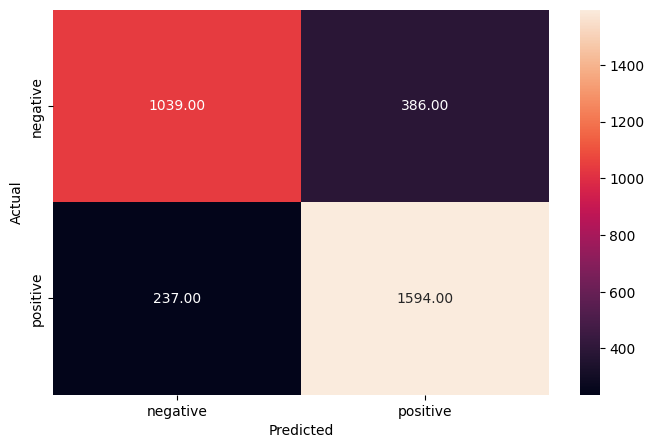

In [ ]:
# building the model

# Training the best model and calculating accuracy on test data
rf_model = RandomForestClassifier(random_state = 7)

# train the model
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# check metrics
metrics_score(y_test, y_pred)


# Implementing Global Vectors (Glove)

GloVe is an alternative to Word2vec. Just like Word2vec, it is also an unsupervised learning algorithm that allows us to take a corpus of text, and intuitively map each word in that document into a position in a high-dimensional latent space which gives us the vector representation of the word.

to use GloVe, you have to download the txt file conisting of the word and vectors

Download link: https://nlp.stanford.edu/projects/glove/ using glove.42B.300d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Loading clean data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/cleaned_df.csv")

# # Remove rows with missing values
data = data.dropna()

# # Display the cleaned DataFrame
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                                  Phrase  \
0             quiet introspective entertaining independent worth seeking   
1                           quiet introspective entertaining independent   
2                                                           entertaining   
3                                                          worth seeking   
4                                            would hard time sitting one   
...                                                                  ...   
16273                            unfocused excruciatingly tedious cinema   
16274                            unfocused excruciatingly tedious cinema   
16275                                             excruciatingly tedious   
16276  really great job anchoring character emotional reality middle age   
16277         great job anchoring c

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip
import numpy as np

file_path = 'glove.42B.300d.txt'
# # the txt file is like a line with words representing the key and 300 vectors representing the values for each word
embeddings_index = {}
with open(file_path, encoding="utf8") as f: # opening the file using the standard text encoding method utf8
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

## to load normally from a path
# emb_path = 'glove.42B.300d\glove.42B.300d.txt'
# embeddings_index = {}
# f = open(emb_path, encoding="utf8")
# for line in f: # looping through the line
#     #Splitting the each Line
#     values = line.split() # splitting the words from the vectors
#     word = values[0] # grabbing the words
#     coefs = np.array(values[1:], dtype='float32') # grabbing every other thing i.e. the vectors and converting them to float
#     embeddings_index[word] =coefs
# f.close() # closing the file
# print('Found %s word vectors.' % len(embeddings_index))

--2024-07-05 08:23:56--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2024-07-05 08:23:56--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2024-07-05 08:23:56--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
# this function creates a normalized vector for the whole sentence
from nltk.tokenize import word_tokenize
def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w]) # passing the words that occur in the cleaned dataset to the vectors
        except: # if the word cannot be found
            continue # the word should be skipped so as to avoid errors
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum()) # normalization

In [ ]:
#select the features and target
X = data["Phrase"].values
y = data["Sentiment"]

In [ ]:
#split the data
X_train, X_test, y_train, y_test =train_test_split(X, y, stratify= y,
                                              random_state= 42, test_size= 0.2, shuffle= True)

In [ ]:
# Create sentence vectors using the above function for training and validation
xtrain_glove =[sent2vec(x) for x in X_train]
xtest_glove = [sent2vec(x) for x in X_test]


##### building the classifier

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1415
           1       0.93      0.96      0.94      1841

    accuracy                           0.93      3256
   macro avg       0.93      0.93      0.93      3256
weighted avg       0.93      0.93      0.93      3256



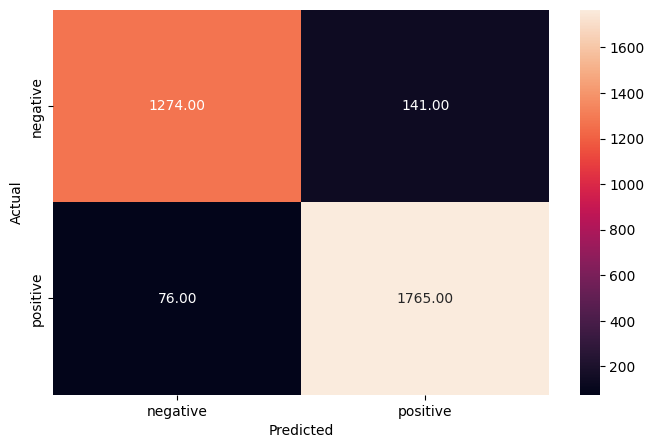

In [ ]:
# initializing the random forest
rf_model_glove = RandomForestClassifier(random_state = 0)

# train the model
rf_model_glove.fit(xtrain_glove, y_train)

# making predictions on the test data
y_pred = rf_model_glove.predict(xtest_glove)

# check metrics
metrics_score(y_test, y_pred)

In [ ]:
import joblib

# Save the Random Forest model
model_path = '/content/drive/MyDrive//rf_model_nlp.pkl'
joblib.dump(rf_model_glove, model_path)

print(f"Random Forest model saved at {model_path}")


Random Forest model saved at /content/drive/MyDrive//rf_model_nlp.pkl


In [ ]:
rf_model_nlp = joblib.load('/content/drive/MyDrive/rf_model_nlp.pkl')

# Example sentences for testing
test_sentences = [
    "This product was good and worth the price.",
    "I am very disappointed with the service.",
    "The food was absolutely delicious.",
    "The movie was a waste of time.",
    "Excellent customer support.",
    "Not satisfied with the quality.",
    "I love this place!",
    "Will never buy from here again.",
    "Amazing experience, would recommend.",
    "The product broke after one use."
]

# Preprocess and predict sentiment for each sentence
for sentence in test_sentences:
    processed_input = sent2vec(sentence)
    processed_input = processed_input.reshape(1, -1)  # Reshape for the model
    prediction = rf_model_nlp.predict(processed_input)
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"The sentiment of the text '{sentence}' is predicted as: {sentiment}")

The sentiment of the text 'This product was good and worth the price.' is predicted as: Positive
The sentiment of the text 'I am very disappointed with the service.' is predicted as: Positive
The sentiment of the text 'The food was absolutely delicious.' is predicted as: Positive
The sentiment of the text 'The movie was a waste of time.' is predicted as: Negative
The sentiment of the text 'Excellent customer support.' is predicted as: Positive
The sentiment of the text 'Not satisfied with the quality.' is predicted as: Positive
The sentiment of the text 'I love this place!' is predicted as: Positive
The sentiment of the text 'Will never buy from here again.' is predicted as: Negative
The sentiment of the text 'Amazing experience, would recommend.' is predicted as: Positive
The sentiment of the text 'The product broke after one use.' is predicted as: Negative


In [ ]:
# Preprocess and predict sentiment for each sentence
for sentence in test_sentences:
    processed_input = sent2vec(sentence)
    processed_input = processed_input.reshape(1, -1)  # Reshape for the model
    prediction_proba = rf_model_nlp.predict_proba(processed_input)
    prediction = rf_model_nlp.predict(processed_input)
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"The sentiment of the text '{sentence}' is predicted as: {sentiment}")
    print(f"Prediction probabilities: {prediction_proba}")

The sentiment of the text 'This product was good and worth the price.' is predicted as: Positive
Prediction probabilities: [[0.25 0.75]]
The sentiment of the text 'I am very disappointed with the service.' is predicted as: Positive
Prediction probabilities: [[0.34 0.66]]
The sentiment of the text 'The food was absolutely delicious.' is predicted as: Positive
Prediction probabilities: [[0.29166667 0.70833333]]
The sentiment of the text 'The movie was a waste of time.' is predicted as: Negative
Prediction probabilities: [[0.53 0.47]]
The sentiment of the text 'Excellent customer support.' is predicted as: Positive
Prediction probabilities: [[0.4 0.6]]
The sentiment of the text 'Not satisfied with the quality.' is predicted as: Positive
Prediction probabilities: [[0.17 0.83]]
The sentiment of the text 'I love this place!' is predicted as: Positive
Prediction probabilities: [[0.27 0.73]]
The sentiment of the text 'Will never buy from here again.' is predicted as: Negative
Prediction probab

In [ ]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.2.2


In [ ]:
import joblib

print("Joblib version:", joblib.__version__)


Joblib version: 1.4.2


In [ ]:
import nltk # for tokenizer

print("NLTK version:", nltk.__version__)


NLTK version: 3.8.1


In [ ]:
print("Numpy version:", np.__version__)

Numpy version: 1.25.2


In [ ]:
conda create -n glove python=3.9 -y
pip install streamlit
pip install nltk==3.8.1
pip install joblib==1.4.2
pip install scikit-learn==1.2.2
streamlit run glove.py --server.port 8502

streamlit run countvec.py --server.port 8502


# Deep Learning


## **Sequential model - LSTM**

Sequential models is a common name for Neural Network architectures, that have units with memory. Here we shall be using LSTM, which is a type of Recurrent Neural Network layer as the memory units.

A typical LSTM unit is made up of a cell, an input gate, an output gate, and a forget gate. The cell is responsible for "remembering" values over extended periods of time and "forgetting" certain values when the context changes. This allows LSTM to maintain "memory." Each of the three gates can be viewed as a Fully-Connected Artificial Neural Network, or Multi-Layer Perceptrons. They calculate an activation (using an activation function) of a weighted sum. Additionally, the input and output vectors are accompanied by a context vector that contains information about the summary of the text it has processed thus far.

Intuitively, the gates regulate the flow of values that pass through the connections of the LSTM, which is why they are referred to as "gates." They tend to output values between '1' and '0', where '1' is multiplied with the context and input vectors. The values that are multiplied with zero are forgotten and those multiplied with 1 are remembered.

**Components of the LSTM**

The LSTM cell contains the following components:

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)



**Working of gates in LSTM**

First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

In [ ]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from tensorflow.keras.models import Sequential
#import tensorflow as tf
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### **Tokenizing and converting the reviews into numerical vectors**

tokenization typically means breaking down text into smaller units, like words or subwords. However, when preparing data for a Recurrent Neural Network (RNN) model, tokenization often involves an additional step: **onverting those tokens into numerical representations.**It assigns a unique integer or vector to each token, allowing Ithe model to process the text as numerical input.

So, in the context of building an RNN model, tokenization might include:

1. Breaking down text into individual words or tokens (tokenization)
2. Converting those tokens into unique integers or vectors (numericalization/vectorization)

The additional step i.e. numericalization is related to TFIDF (Term Frequency-Inverse Document Frequency) and BOW (Bag-of-Words) vectorization, but not exactly the same.

All three techniques involve converting text into numerical representations, but they differ in their approaches and goals:

1. Numericalization (for RNNs): Assigns a unique integer or vector to each token, preserving the sequence order. This is typically done using a lookup table or embedding layer.
2. BOW: Represents text as a bag, or set, of words, disregarding order. Each document is a vector where each element corresponds to the frequency of a word in the document.
3. TFIDF: Builds upon BOW by weighing word frequencies with their importance (inverse document frequency) across the entire corpus.

Key differences:

- Order matters: Numericalization preserves sequence order, while BOW and TFIDF do not.
- Vector space: Numericalization often uses dense vectors (e.g., word embeddings), whereas BOW and TFIDF typically use sparse vectors (binary or frequency-based).
- Context: Numericalization is used for sequence-based models (RNNs, LSTMs), while BOW and TFIDF are commonly used for traditional machine learning models (e.g., SVM, Naive Bayes).

While all three techniques involve vectorization, they serve different purposes and are applied in distinct contexts.

In [ ]:
# Creating the tokenizer with 700 vocab size
# using only 700 vocabularies (unique words) in the dataset
tokenizer = Tokenizer(num_words = 700, split = ' ')

tokenizer.fit_on_texts(data['Phrase'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data['Phrase'].values)
# tokenizing the sentences and converting it to sequences of integars
# the integars are positions that represent the index of each word in the original text - not one-encoded values
# Padding the sequences
X = pad_sequences(X, 100)
# 100 represents maximum length for character limit

- note that if the goal is to build an app such that users will put their input from the frontend, and then pre-processed by the machine learning engineer (you), the tokenizer responsible for converting the input to sequences must be saved

In [ ]:
# saving the tokenizer on colab
import pickle

with open("/content/drive/MyDrive/sent_a/tokenizer.pkl", "wb") as handle:
   pickle.dump(tokenizer, handle)

with open("tokenizer.pkl", "wb") as handle:
  pickle.dump(tokenizer, handle)

**Model Building**

In [ ]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = 100))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=700, output_dim=120, input_length=100))

# Spatial Dropout layer
model.add(SpatialDropout1D(0.2))

# LSTM layer with parameters set to be compatible with cuDNN
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0,
               activation='tanh', recurrent_activation='sigmoid',
               use_bias=True, unit_forget_bias=True))

# Dense layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 120)          84000     
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 120)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 150)               162600    
                                                                 
 dense_1 (Dense)             (None, 2)                 302       
                                                                 
Total params: 246902 (964.46 KB)
Trainable params: 246902 (964.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "orange" would be located near "tangerine" and "queen" would be near "empress." The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 150 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- To prevent bias, a dropout layer is employed to regulate the network.

- The final layer is a Dense layer which serves as the output layer and has 2 cells to perform classification, representing the 2 different categories in this example.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

**Splitting the Data**

In [ ]:
data["Sentiment"].replace(4, 1, inplace = True)
# because we are only using two classes; 4 representing positive

In [ ]:
# creating the target feature
y = data["Sentiment"]

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_enc = to_categorical(y_train, 2)
y_test_enc = to_categorical(y_test, 2)

**Training the model**

In [ ]:
model_path = "/content/drive/MyDrive/sent_a/nlp_model.h5"
#model_path = "nlp_model.keras"

es = EarlyStopping(patience=3, verbose=2, monitor = "val_loss")
#chkpt = ModelCheckpoint(model_path, verbose = 2, save_best_only = True)


In [ ]:
y_train_enc

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [ ]:
# specifying the batch size
batch_size = 32

# fitting the model on the training data with 10 epochs
#history = model.fit(X_train, y_train_enc, epochs = 10, batch_size = batch_size, callbacks=[es, chkpt],verbose = 1,
#                validation_split = 0.1)

history = model.fit(X_train, y_train_enc, epochs = 10, batch_size = batch_size,verbose = 1,
                validation_split = 0.1)

Epoch 1/10
412/412 [==============================] - 22s 40ms/step - loss: 0.4295 - accuracy: 0.7811 - val_loss: 0.3401 - val_accuracy: 0.8519
Epoch 2/10
412/412 [==============================] - 4s 10ms/step - loss: 0.3018 - accuracy: 0.8651 - val_loss: 0.3011 - val_accuracy: 0.8710
Epoch 3/10
412/412 [==============================] - 3s 8ms/step - loss: 0.2808 - accuracy: 0.8718 - val_loss: 0.2988 - val_accuracy: 0.8710
Epoch 4/10
412/412 [==============================] - 3s 8ms/step - loss: 0.2648 - accuracy: 0.8799 - val_loss: 0.2970 - val_accuracy: 0.8765
Epoch 5/10
412/412 [==============================] - 4s 9ms/step - loss: 0.2512 - accuracy: 0.8837 - val_loss: 0.2949 - val_accuracy: 0.8730
Epoch 6/10
412/412 [==============================] - 4s 10ms/step - loss: 0.2337 - accuracy: 0.8941 - val_loss: 0.3034 - val_accuracy: 0.8717
Epoch 7/10
412/412 [==============================] - 3s 8ms/step - loss: 0.2252 - accuracy: 0.8954 - val_loss: 0.2969 - val_accuracy: 0.8792
Ep

In [ ]:
# saving the model
#model_path = "/content/drive/MyDrive/sent_a/model.keras"

#model.save(model_path)


In [ ]:
len(y_test_enc)

1628

### Testing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # not used
from tensorflow.keras.preprocessing.sequence import pad_sequences

# always use the tokenizer generated from your training and not the one imported - to prevent wrong predictions
# let's load the tokenizer from the path
with open('/content/drive/MyDrive/sent_a/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# def preprocess_text(text):
#     # Tokenize the text
#     tokens = tokenizer.texts_to_sequences([text])
#     # Pad the sequences to a fixed length
#     padded_tokens = pad_sequences(tokens, maxlen=100)
#     return padded_tokens[0] # for single

def preprocess_text(text):
    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([text])
    # Pad the sequences to a fixed length
    padded_tokens = pad_sequences(tokens, maxlen=100)
    return padded_tokens # for single and multiple texts

# Example of a random text for testing
input_text = "This product was good and worth the price."
processed_input = preprocess_text(input_text)

# Reshape processed_input to match the model's expected input shape (1, sequence_length)
#processed_input = np.reshape(processed_input, (1, -1))

# Make predictions
prediction = model.predict(processed_input)

# Convert predicted probabilities to sentiment labels ( binary classification)
sentiment = "Negative" if prediction[0][0] > 0.5 else "Positive"

print(f"Prediction probabilities: {prediction}")
print(f"The sentiment of the text '{input_text}' is predicted as: {sentiment}")


1/1 [==============================] - 0s 28ms/step
Prediction probabilities: [[0.00730381 0.9934    ]]
The sentiment of the text 'This product was good and worth the price.' is predicted as: Positive


In [ ]:
# Test with different input texts
test_texts = [
    "This product was good and worth the price.",
    "I hated this product, it was a waste of money.",
    "Excellent quality, I am very satisfied with this purchase.",
    "Terrible experience, will not buy again.",
    "The item is okay, not great but not bad either.",
    "Fantastic service, highly recommend!",
    "Bad quality, completely disappointed.",
    "Great value for the price, very happy with it."
]

for input_text in test_texts:
    processed_input = preprocess_text(input_text)
    # Make predictions
    prediction = model.predict(processed_input)
    # Convert predicted probabilities to sentiment labels
    sentiment = "Negative" if prediction[0][0] > 0.5 else "Positive"
    # Debug: Print the raw prediction probabilities and sentiment
    print(f"Text: '{input_text}'")
    print(f"Prediction probabilities: {prediction}")
    print(f"The sentiment of the text is predicted as: {sentiment}\n")


1/1 [==============================] - 0s 21ms/step
Text: 'This product was good and worth the price.'
Prediction probabilities: [[0.00730381 0.9934    ]]
The sentiment of the text is predicted as: Positive

1/1 [==============================] - 0s 18ms/step
Text: 'I hated this product, it was a waste of money.'
Prediction probabilities: [[9.9999857e-01 1.1652944e-06]]
The sentiment of the text is predicted as: Negative

1/1 [==============================] - 0s 18ms/step
Text: 'Excellent quality, I am very satisfied with this purchase.'
Prediction probabilities: [[5.5643712e-05 9.9994373e-01]]
The sentiment of the text is predicted as: Positive

1/1 [==============================] - 0s 18ms/step
Text: 'Terrible experience, will not buy again.'
Prediction probabilities: [[0.9972698  0.00267904]]
The sentiment of the text is predicted as: Negative

1/1 [==============================] - 0s 17ms/step
Text: 'The item is okay, not great but not bad either.'
Prediction probabilities: [[9.

In [ ]:
# Preprocess function
def preprocess_text(text):
    tokens = tokenizer.texts_to_sequences([text])
    padded_tokens = pad_sequences(tokens, maxlen=100)
    return padded_tokens[0]  # Return the padded sequence as a 1D array

# Convert X_test to a list of strings if it's not already
X_test = X_test.astype(str).tolist() if isinstance(X_test, np.ndarray) else X_test

# Preprocess all texts in X_test and store them in a list
X_test_processed = []
for text in X_test:
    processed_text = preprocess_text(text)
    X_test_processed.append(processed_text)

# Convert list of processed texts to numpy array
X_test_processed = np.array(X_test_processed)

# Predict on X_test
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test_enc (if it's one-hot encoded) to 1D array
y_test = np.argmax(y_test_enc, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Print confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)


51/51 [==============================] - 0s 5ms/step
Accuracy: 0.4287
              precision    recall  f1-score   support

    Negative       0.43      1.00      0.60       698
    Positive       0.00      0.00      0.00       930

    accuracy                           0.43      1628
   macro avg       0.21      0.50      0.30      1628
weighted avg       0.18      0.43      0.26      1628

Confusion Matrix:
[[698   0]
 [930   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Deployment with Streamlit, Git, Docker and Render

this will be done using anaconda prompt, Visual Studio code, streamlit, dockker and Render


### Building streamlit app using VS code and Anaconda Prompt

**Streamlit**

Alternatives: Dash, Shiny

Streamlit is a Python package that allows you to create web apps for machine learning and data science projects with minimal code. By writing simple Python scripts, Streamlit helps you visualize data and create interactive applications quickly and easily. To access streamlit effectively we can use either VS Code or Spyder

1. VS Code - more versalite and works with many languages

Visual Studio Code (VS Code) is a versatile and highly customizable code editor developed by Microsoft. It supports a wide range of programming languages and is known for its rich ecosystem of extensions, which enhance functionality. It's widely used for web development, data science, and general programming, offering features like debugging, version control, and integrated terminals.


2. Spyder - Python only -  focused on the needs of data scientists and researchers

Spyder (Scientific Python Development Environment) is an open-source IDE specifically designed for data science and scientific computing. It integrates with popular scientific libraries like NumPy, SciPy, and Matplotlib, providing a powerful environment for developing and debugging Python scripts. It features a code editor, variable explorer, and interactive console.


- for this project, we will be using VS code


In [ ]:
On anaconda prompt

# create conda environment
conda create -n mlopz python=3.9 pip -y
# mlopz is environment name; always install python and pip. using version 3.9 since it works well with tensorflow
# -y is yes so as to install all the necessary packages automatically

# check all the environment you have
conda info --envs

# activate the one you want to use
conda activate mlops

# install tensorflow: version used to build model is version: 2.15.0
conda install tensorflow==2.15.0
pip install tensorflow==2.15.0


# install streamlit
pip install streamlit

# clear session
cls


# change to model's directory
cd sent_a

# switch to vc code
code

# run the streamlit app created on vs code
streamlit run app.py

# to prevent tensorflow and embedding errors, ensure you are using a model format that is compatible with your local PC version
# hence, model should be saved as h5 and not as a keras. model.h5 should be used

## Tracking of version and linking files to Github in preparation for deployment
**Git** (Alternatives: Mercurial, Subversion (SVN)
)

Git is a version control system that tracks changes to your code over time. It enables multiple collaborators to work on the same project simultaneously, keeping track of who made changes and when. Git helps prevent conflicts and allows you to revert to previous versions of your code if necessary.

In [ ]:
## download git on google and switch to anaconda prompt
# after the above, install pipreqs on prompt to generate requirement.txt

conda activate mlopz

pip install pipreqs
pipreqs --encoding=utf8 # might not work; you can try
pip freeze > requirements.txt

# create a folder/ directory
mkdir sent_a

# enter directory
cd sent_a

# next is to upload files from local PC to git repository; this is done using git. download it
git init

# add all files to the hidden folder created from git init
git add .

# commit
git config user.name "Kolawole Osokoya"
git config user.email "kolawoleosokoya@gmail.com"
git commit -m "initial commit"


# connect your newly created respository; go to github create a new resposity and copy the line starting from remote
git remote add origin https://github.com/Oshokz/testing.git

# push
git push -u origin master

# refresh the repository; the files have been updated

# update items
git status # to see whether some items are not tracked or needs to be updated
git add app.py # add one item
git add . #  update all files:
git commit -m "sending the files for sentiment project"
git push


# check author and date of git
git log

# SECOND METHOD

# Go to your github and copy the link of an existing respository. github > respository> code > copy link

# activate environment on anaconda prompt and clone the repository. It could be an empty rep or existig one
# this automatically pastes the repository as a folder on your PC without having to create a directory
conda activate mlopz
git clone https://github.com/Oshokz/testing.git

# change to the directory of the cloned rep
cd testing

# copy the files you want to push manually into your Users folder.
move tokenizer.pkl testing

git add . #  update all files:

#commit
git commit -m "sending the files for sentiment project"
git commit -m "Normalize all the line endings"

# push them remotely to your repository
git push

# go to your repository to confirm changes

## Storing all the necessary dependencies and configuration of the web app in a container

**Docker** (Alternatives: Kubernetes, Podman)

Docker is a platform for developing, shipping, and running applications inside containers. Containers bundle an application with all its dependencies, ensuring it runs consistently across different environments. This makes development, testing, and deployment more efficient and reliable.

Containers are lightweight, standalone, and executable software packages that include everything needed to run an application: code, runtime, system tools, libraries, and settings. Containers ensure that applications behave the same regardless of where they are run, eliminating the "it works on my machine" problem.

Read on OOP and Django

### Case Study
A data scientist build an application using Window. The project was built using  Python 3.9 and contains requirement.txt (containing packages names and their version e.g. Streamlit, Tensorflow) and the app (app.py). When tested on Windows operating system, it works perfectly. But when the scientist copied all the files and tried to deploy or test the app on another operating system say Linus, one could start getting errors in the code. This is one of the reasons why most models don't get to deployment as they often break when transferred between different environments. Docker was developed to address this issue. With docker we can package all the dependencies and configurations used to build an application and it will work regardless of the operating system whether Linus, Mac or Window. It makes sure code runs consistently accross different environment


### Key concepts

• Docker Images: Images are the building blocks of containers. They are read-only templates that contain the application code, libraries, and dependencies needed to run an application.

They are like blueprints. They contain the instructions for creating a container, including the application and its dependencies.

• Docker Containers: Containers are instances of images that can be executed. They are isolated, portable, and provide a consistent runtime environment for your application.

They are like the houses built from the blueprints. A container is a running instance of an image, which means it's the actual application running as per the instructions in the image. Images provide the plan, and containers bring the plan to life.

• Dockerfile: A Dockerfile is a text file that contains instructions for building a Docker image. It specifies the base image, sets environment variables, copies files into the image, and more. It is a file with no extension e.g. .txt, .pdf

• Docker Hub: Docker Hub is a public registry where you can find and share Docker images. This is just like Github where you push your docker image to remotely for colleagues to access


download docker https://docs.docker.com/desktop/install/windows-install/

docker might require windows update. On PC ,Setting > update > update the windows

**Virtual Environment**: creating an environment that installs different packages and dependecies so as not to interfere with other projects or global system

**Virtual Machines**: VMs, provide hardware-level virtualization. Each VM runs a complete operating system, including its own kernel. This results in more significant overhead compared to containers, as VMs consume more resources.

its about creating an entire operating system on your PC for a particular project and making sure the work doesnt coincide with your local PC. VMs allow multiple OS environments to coexist on a single physical machine, each isolated from the others. This enables testing, development, and deployment across different environments without needing separate hardware.

steps to use Docker
1. create a requirement.txt file: here you will paste the major libraries and version you used in building your application e.g. tensorflow and streamlit. Note that once you list this major libraries, you dont need to add their dependecies e.g. numpy because as tensorflow is installed, it will also install it's dependencies alongside. In this project, we are listing only two packages on our requirement.txt

the correct versions can be found by using "conda list" on anaconda prompt
streamlit==1.36.0

tensorflow==2.15.0

the version of python will be added to the dockerfile and not the requirements.txt


2. Launch docker

In [ ]:
# activate environment and change directory
conda activate mlopz
cd testing

# create a requirements.txt file. This can be done using 3 methods

1. "conda list" on anaconda #then copy the streamlit and tensorflow version and their names and create a requirements.txt file on VS code then paste
2. freeze > requirements.txt
# this automatically generate the requirements.txt file and stores it inside your directory. Open the txt file and delete all the packages and leave only main ones

# check docker status
docker ps

# on VS code, create a docker file inside your folder or directory
# create dockerfile and paste the following instructions
FROM python:3.9.19 # since we are using python 3.9, we need to indicate the exact version of 3.9; this can be found on conda list
COPY . /app # create a folder called app and copy all the files we need
WORKDIR /app # letting docker know that our new directory is now the app folder
RUN pip install -r requirements.txt # telling Docker what to install
CMD streamlit run sentiment_app.py # the command we want to run when building the docker image

# Build your docker image
docker build -t sentiment_app .

# check docker images for confirmation
docker images

# run the docker image on your local PC
docker run -p 8501:8501 sentiment_app

#copy the local host link and paste on your google chrome
  Local URL: http://localhost:8501

# you can stop the container from running
docker stop festive_ramanujan

# push your docker image to your docker hub - hub.docker.com
docker login

# tag the docker image: oshoks is the username on docker hub
docker tag sentiment_app oshoks/sentiment_app:v1

# push
docker push oshoks/sentiment_app:v1

## Deploying the Web application

**Render** (Alternatives: Heroku, Netlify, Firebase, DigitalOcean; Major Cloud Platforms are GCP, Azure, AWS)

Render is a cloud platform that simplifies the process of deploying web applications, APIs, and static sites. It automates deployment, manages scaling, and provides features like SSL, custom domains, and continuous deployment from your Git repositories, making it easy to bring your projects online quickly.

- one can skip the docker stage and deploy to Render after using Git; however you can run into problems because of the configuration of Render because Render's default is Python 3.7 while Tensorflow v2 supports Python 3.9. Hence, we have to the Docker file that contains all the correct packages and version used to create a docker image which Render will work with

- on your VS code, use relative path to load the model and others since they are inside the same directory. e.g. model = load_model("model.h5"). Render wil not recognize your full directory.
n
- note that to deploy on render, we need the dockerfile or the docker image (advance method). Let's use dockerfile

In [ ]:

# RENDER; on render.com or https://dashboard.render.com/
-click on web services > new
- connect to github account
- select the newly created repository
- start command choose ;  streamlit run app.py

#### Saving the packages used

In [ ]:
import nbformat
import re
import subprocess
import sys
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to extract import statements from the notebook
def extract_imports_from_notebook(notebook_path):
    with open(notebook_path, 'r') as f:
        nb = nbformat.read(f, as_version=4)

    imports = set()
    for cell in nb.cells:
        if cell.cell_type == 'code':
            code = cell.source
            # Extract imports and from-imports
            imports.update(re.findall(r'^\s*import\s+(\S+)', code, re.MULTILINE))
            imports.update(re.findall(r'^\s*from\s+(\S+)', code, re.MULTILINE))
    return imports

# Function to get installed packages with versions
def get_installed_packages_with_versions():
    installed_packages = subprocess.check_output(["pip", "freeze"])
    installed_packages = installed_packages.decode("utf-8").split('\n')
    return {pkg.split('==')[0]: pkg for pkg in installed_packages if pkg}

# Function to filter out standard library modules
def filter_standard_libs(packages):
    stdlib_list = set(sys.stdlib_module_names)
    return {pkg for pkg in packages if pkg not in stdlib_list}

# Path to your notebook within Google Drive
notebook_path = '/content/drive/My Drive/sent_a/Sentiment_Analysis_colab_v.ipynb'

# Extract imports from the notebook
imported_packages = extract_imports_from_notebook(notebook_path)

# Filter out standard library modules from imported packages
filtered_imported_packages = filter_standard_libs(imported_packages)

# Get installed packages with versions
installed_packages = get_installed_packages_with_versions()

# Combine both sets and keep versions for installed packages
all_packages = {pkg: installed_packages.get(pkg, f"{pkg}") for pkg in filtered_imported_packages.union(installed_packages)}

# Save the requirements to a file
with open("requirements.txt", "w") as f:
    for package in sorted(all_packages.values()):
        f.write(package + "\n")

# Verify the file has been created
!cat requirements.txt

# Optional: Download the file if running in Google Colab
from google.colab import files
files.download("requirements.txt")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Babel==2.15.0
CacheControl==0.14.0
Cython==3.0.10
Flask==2.2.5
GDAL==3.6.4
Jinja2==3.1.4
Markdown==3.6
MarkupSafe==2.1.5
PIL
Pillow==9.4.0
PyDrive2==1.6.3
PyDrive==1.3.1
PyGObject==3.42.1
PyJWT==2.3.0
PyOpenGL==3.1.7
PySocks==1.7.1
PyWavelets==1.6.0
PyYAML==6.0.1
Pygments==2.16.1
SQLAlchemy==2.0.31
SecretStorage==3.3.1
Send2Trash==1.8.3
Sphinx==5.0.2
StrEnum==0.4.15
Werkzeug==3.0.3
absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyascii==0.3.2
anyio==3.7.1
argon2-cffi-bindings==21.2.0
argon2-cffi==23.1.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.9.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TensorFlow version: 2.15.0


In [ ]:
import tensorflow as tf

tf_version = tf.__version__

# if Keras version based on TensorFlow version
if tf.__version__.startswith('2.'):
    keras_version = tf.__version__
else:
    keras_version = "Version not found"  # You can handle older TensorFlow versions here

print(f'TensorFlow version: {tf_version}')
print(f'Keras version: {keras_version}')


TensorFlow version: 2.15.0
Keras version: 2.15.0


## Attention Mechanism
The attention mechanism is a "word-to-word" operation. It help BERT to focus on different part of a sentence by enabling BERT to look at each word in the sentence. Thats why 'He got bit by Python' is different from'Python is my favorite Programming language', Bert takes the sentence from right to left and left to right simultanously it will be able to understad the sentiment, unlike LSTM and RNN that takes the words on at a time.

## BERT
It give the embedding of each word based on the context of the word in the text.
- The attention mechanism is a fundamental component of BERT (Bidirectional Encoder Representations from Transformers) and many other transformer-based models.
- It plays a crucial role in capturing relationships between words in a sentence and forms the foundation for BERT's contextual understanding of text.
- The attention mechanism in BERT allows the model to focus on different parts of the input sentence when encoding each word.
- This enables BERT to understand the context in which a word appears, considering both preceding and succeeding words.

BERT's key innovation lies in its bidirectional context understanding.
Unlike traditional language models that process text sequentially (left-to-right or right-to-left), BERT reads the entire input sentence in both directions simultaneously. This allows it to capture the contextual meaning of words more accurately and handle complex linguistic structures.
BERT check the word in each sentence from left to right, right to left and understand the comntext of each word

### Attention Score
Sentence A: He got bit by python
Sentence B: Python is my favorite language

- In Sentence A, the attention score between 'got' and 'python' will be higher than that of 'by' and 'python'
- In Sentence B, The attention score between 'Python' and 'language' will be higher than that of 'Python' and 'is'

## BERT Embeddings
The embeddings of the BERT input sequence are the sum of the token embeddings, segment embeddings, and positional embeddings.

Token Embeddings
Segment Embeddings
Positional Embeddings

##Components of BERT
BERT can be used in two ways

1. BERT encoder (pre-trained weights from BERT): consists of the pre-trained weights from BERT. These weights are obtained from training BERT on a large corpus of text data. You can extract embeddings from a pre-trained BERT model and use these embeddings as features for a classical machine learning model (e.g., Random Forest, SVM). Once you have the BERT embeddings for your dataset, you can train a classical machine learning model on these embeddings.

2. Pre-training and Fine tuning: You can fine-tune a pre-trained BERT model on your specific sentiment analysis dataset. This approach involves updating the weights of the BERT model during training, tailored to your sentiment analysis task. Once fine-tuned, the BERT model itself is used to predict sentiment without needing an additional classical machine learning model

BERT is originally pretrained on a large corpus by predicting masked words within sentences (Masked Language Model, MLM - for predicting missing words) and predicting whether two sentences follow each other in the original corpus (Next Sentence Prediction, NSP e.g. you give it one sentence and you ask it to predict the next sentence e.g lyric generation).


## Types of BERT
- BERT-Base and BERT-Large
- BERT Multilingual
- BERT with Sentence Order Prediction (BERT-NextSentence)
- BERT Whole-Word Masking (BERT-WWM)
- DistilBERT - the lightest
- ROBERTa
- ALBERT
- Electra

#### Implementing DistilBERT

In [ ]:
#!pip install transformers

In [ ]:
# loading the cleaned data
# Mount Google Drive
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

# Load the cleaned dataset with the same encoding
data = pd.read_csv("/content/drive/MyDrive/cleaned_df.csv")

# # Remove rows with missing values
data = data.dropna()

# # Display the cleaned DataFrame
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                  Phrase  Sentiment
0      quiet introspective entertaining independent w...          1
1           quiet introspective entertaining independent          1
2                                           entertaining          1
3                                          worth seeking          1
4                            would hard time sitting one          0
...                                                  ...        ...
16273            unfocused excruciatingly tedious cinema          0
16274            unfocused excruciatingly tedious cinema          0
16275                             excruciatingly tedious          0
16276  really great job anchoring character emotional...          1
16277  great job anchoring character emotional realit...          1

[16277 rows x 2 columns]


In [ ]:
#select the features and target
X = data["Phrase"].values
y = data["Sentiment"]

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, stratify= y,
                                              random_state= 42, test_size= 0.2, shuffle= True)

In [ ]:
# Load the the DistilBERT tokens and model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

import torch
#it is more convenient to use pytorch for BERT than using tensorflow. Pytorch was created by Facebook; tensorflow was created by Google

from torch.utils.data import TensorDataset, DataLoader, RandomSampler
# DataLoader- to load in batches so as not to load all at once

tokenizer= DistilBertTokenizer.from_pretrained("distilbert-base-uncased") #uncase means upper or lower case
bert_model =DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels =2) # our data has 2 labels

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# testing

sample_tweet = X_train[120] # select any sample
inputs = tokenizer(sample_tweet, padding =True, truncation=  True, return_tensors ="pt")
#Truncation is True because BERT can only train a sentence maximum of 512 words; used in case the row is long

print(inputs)

{'input_ids': tensor([[  101,  5810, 14662,  8870,  6279,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


- the input IDs represent token embeddings; it is just like assigning integars to represent each word there

- the attention mask is the segment embedding; those 1,1,1 means all the token embedding came from one sentence. this is because we only passed a single sentence in the sample_tweet

- the tokenizer will give the token embedding and segment embedding

In [ ]:
# function to pre-process text
def preprocess_data(input_text, label, tokenizer):
  inputs = tokenizer(input_text.tolist(), padding = True, truncation = True, return_tensors = "pt") # passing the entire text
  labels = torch.tensor(label.tolist())
  dataset = TensorDataset(inputs["input_ids"], inputs["attention_mask"], labels)
  return dataset

train_dataset = preprocess_data(X_train, y_train, tokenizer)
test_dataset = preprocess_data(X_test, y_test, tokenizer)

In [ ]:
# creating data loader; how we want it to load our data

batch_size = 32

#sample the train dataset randomly
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler = train_sampler, batch_size= batch_size)

In [ ]:
# defining optimizer; to adjust the weight or parameter or coefficient of the BERT model neural network
# set up the optimizer
optimizer = torch.optim.AdamW(bert_model.parameters(), lr = 1e-5)
# we can use any optimizer, using the modifed version of adam i.e AdamW

"""
adjusting the weight for every batch is good but computationally demanding since we are working with BERT. Because BERT takes longer time
we can adjust the weight for a specific time by setting gradient accumulation. This is an advantage of using pytorch. It is optional and negatively might affect the performance of the model.

"""
#set gradient accumulation
gradient_accummulation = 4


In [ ]:
# Set the model to training mode
bert_model.train()

# Define the gradient accumulation steps
gradient_accumulation = 2  # You can change this to your desired value

for epoch in range(2):  # Change to your taste - experimenting with 2 epochs for computational reasons
    print(f"******************Epoch:{epoch+1}*****************")  # Just to know the code is working
    total_loss = 0

    for step, batch in enumerate(train_dataloader):  # This will show us what is happening during the training, another great PyTorch feature
        # Clear any gradients already accumulating; to clear session
        optimizer.zero_grad()

        # Forward pass
        outputs = bert_model(input_ids=batch[0], attention_mask=batch[1], labels=batch[2])
        """
        The model will be training on the token embeddings (first batch), segment embeddings (second batch), and the labels (last batch).
        Hence the model will not just give us the embeddings, it will also give us the prediction of the sentiments.
        """
        loss = outputs.loss
        loss = loss / gradient_accumulation

        # Take the gradient of the loss
        loss.backward()

        if (step + 1) % gradient_accumulation == 0:
            optimizer.step()
            total_loss += loss.item()
            print(f"-------------------Adjusted weights after {step+1} steps-----------")

    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} - Average loss: {average_loss}")


******************Epoch:1*****************
-------------------Adjusted weights after 2 steps-----------
-------------------Adjusted weights after 4 steps-----------
-------------------Adjusted weights after 6 steps-----------
-------------------Adjusted weights after 8 steps-----------
-------------------Adjusted weights after 10 steps-----------
-------------------Adjusted weights after 12 steps-----------
-------------------Adjusted weights after 14 steps-----------
-------------------Adjusted weights after 16 steps-----------
-------------------Adjusted weights after 18 steps-----------
-------------------Adjusted weights after 20 steps-----------
-------------------Adjusted weights after 22 steps-----------
-------------------Adjusted weights after 24 steps-----------
-------------------Adjusted weights after 26 steps-----------
-------------------Adjusted weights after 28 steps-----------
-------------------Adjusted weights after 30 steps-----------
-------------------Adjusted wei

In [ ]:
# Initialize variables for early stopping
best_loss = float('inf')
patience = 2
counter = 0

# Training loop
for epoch in range(2):  # Change to your taste - experimenting with 2 epochs for computational reasons
    print(f"******************Epoch:{epoch+1}*****************")  # Just to know the code is working
    total_loss = 0

    for step, batch in enumerate(train_dataloader):  # This will show us what is happening during the training, another great PyTorch feature
        # Clear any gradients already accumulating; to clear session
        optimizer.zero_grad()

        # Forward pass
        outputs = bert_model(input_ids=batch[0], attention_mask=batch[1], labels=batch[2])
        """
        The model will be training on the token embeddings (first batch), segment embeddings (second batch), and the labels (last batch).
        Hence the model will not just give us the embeddings, it will also give us the prediction of the sentiments.
        """
        loss = outputs.loss
        loss = loss / gradient_accumulation

        # Take the gradient of the loss
        loss.backward()

        if (step + 1) % gradient_accumulation == 0:
            optimizer.step()
            total_loss += loss.item()
            print(f"-------------------Adjusted weights after {step+1} steps-----------")

    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} - Average loss: {average_loss}")

    # Early stopping and saving the best model
    if average_loss < best_loss:
        best_loss = average_loss
        counter = 0
        # Save the best model
        torch.save(bert_model.state_dict(), best_model_path)
        joblib.dump(tokenizer, tokenizer_path)
        print(f"Best model saved with average loss: {best_loss}")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

print(f"Best model path: {best_model_path}")
print(f"Tokenizer path: {tokenizer_path}")